### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [73]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
lista_alumnos = [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]

In [75]:
edad = [e[2] for e in lista_alumnos]
altura = [e[3] for e in lista_alumnos]

In [76]:
X = np.array(edad).reshape(-1,1)
y = np.array(altura).reshape(-1,1)

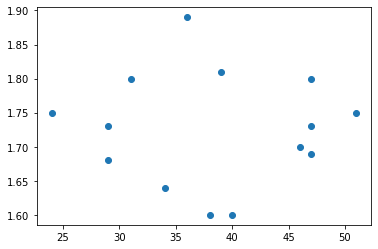

In [77]:
plt.scatter(X, y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
model = LinearRegression()

In [80]:
model.fit(X_train, y_train)
print(model.intercept_ , model.coef_)

[1.68675046] [[0.00104662]]


Text(0.5, 0, 'age')

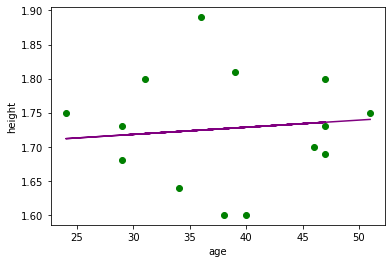

In [81]:
plt.scatter(X, y, color = "green")
plt.plot(X, model.predict(X), color="purple")
plt.ylabel("height")
plt.xlabel("age")

**¿Es una buena técnica para este tipo de problemas? ¿Por qué?**

No porque como se puede observar en el gráfico, los datos no se distribuyen de forma linear y por tanto el modelo linear no se ajusta a los datos.

**¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?**

In [82]:
dict_edad_altura = {"edad": edad , "altura": altura, "prediction":[e for lista in model.predict(X).tolist() for e in lista]}
df_edad_altura = pd.DataFrame(dict_edad_altura)
df_edad_altura["error"] = df_edad_altura["altura"] - df_edad_altura["prediction"]

In [83]:
df_edad_altura

,edad,altura,prediction,error
0,47,1.80,1.735941,0.064059
1,31,1.80,1.719196,0.080804
2,39,1.81,1.727569,0.082431
3,29,1.73,1.717102,0.012898
4,47,1.73,1.735941,-0.005941
5,24,1.75,1.711869,0.038131
6,34,1.64,1.722335,-0.082335
7,36,1.89,1.724429,0.165571
8,46,1.70,1.734895,-0.034895
9,29,1.68,1.717102,-0.037102


In [84]:
print(f'MSE --> {mean_squared_error(y_test, model.predict(X_test))}\
    \nRMSE --> {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')


MSE --> 0.007997033692725369    
RMSE --> 0.08942613540081763


**Representa la matriz de correlación, ¿los datos están correlacionados?**

In [85]:
corr_matrix = df_edad_altura[["edad", "altura"]].corr()
corr_matrix

,edad,altura
edad,1.000000,-0.016521
altura,-0.016521,1.000000


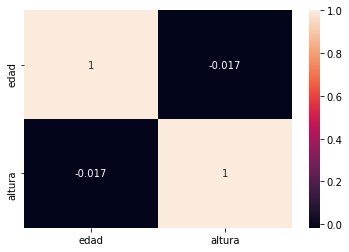

In [86]:
sns.heatmap(corr_matrix, annot = True)

**¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?**

In [92]:
X_2 = X*2
y_2 = y*2

In [88]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2)

In [94]:
model_2 = LinearRegression()
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [95]:
print(model_2.intercept_ , model_2.coef_)

[3.47570265] [[-0.00051681]]


In [100]:
model_3 = LinearRegression()
model_3.fit(X_2_train, y_train)

LinearRegression()

In [101]:
print(model_3.intercept_ , model_3.coef_)

[1.72845664] [[7.96460177e-06]]


Text(0.5, 0, 'age')

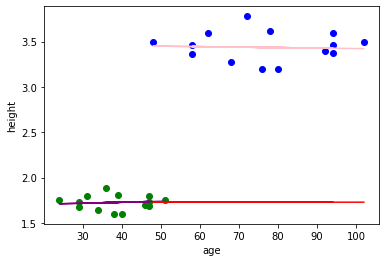

In [102]:
plt.scatter(X, y, color = "green")
plt.scatter(X_2, y_2, color = "blue")
plt.plot(X, model.predict(X), color="purple")
plt.plot(X_2, model_2.predict(X_2), color="pink")
plt.plot(X_2, model_3.predict(X_2), color = "red")
plt.ylabel("height")
plt.xlabel("age")